In [7]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
!pip install seaborn
 
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [11]:
from fosforml.model_manager.snowflakesession import get_session

my_session = get_session()

table_name = 'DATAANALYSISFINAL'

sf_df = my_session.sql("select * from {}".format(table_name))

df = sf_df.to_pandas()
 

In [12]:
df.shape

(16848, 13)

In [13]:
df.isnull().sum()

DATE             0
DRUG_ID          0
CUSTOMER_NAME    0
VOLUME           0
UNIT_PRICE       0
TOTAL            0
Discount%        0
CUSTOMER         0
CITY             0
REGION           0
COUNTRY          0
NAME             0
SEGMENT          0
dtype: int64

In [14]:
df.nunique()

DATE             2106
DRUG_ID            10
CUSTOMER_NAME      80
VOLUME           1356
UNIT_PRICE          8
TOTAL            1461
Discount%           4
CUSTOMER            8
CITY               10
REGION              7
COUNTRY             9
NAME                9
SEGMENT             5
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16848 entries, 0 to 16847
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           16848 non-null  object 
 1   DRUG_ID        16848 non-null  object 
 2   CUSTOMER_NAME  16848 non-null  object 
 3   VOLUME         16848 non-null  float64
 4   UNIT_PRICE     16848 non-null  int16  
 5   TOTAL          16848 non-null  float64
 6   Discount%      16848 non-null  int8   
 7   CUSTOMER       16848 non-null  object 
 8   CITY           16848 non-null  object 
 9   REGION         16848 non-null  object 
 10  COUNTRY        16848 non-null  object 
 11  NAME           16848 non-null  object 
 12  SEGMENT        16848 non-null  object 
dtypes: float64(2), int16(1), int8(1), object(9)
memory usage: 1.5+ MB


In [ ]:
import subprocess
import sys

# Function to install a package
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


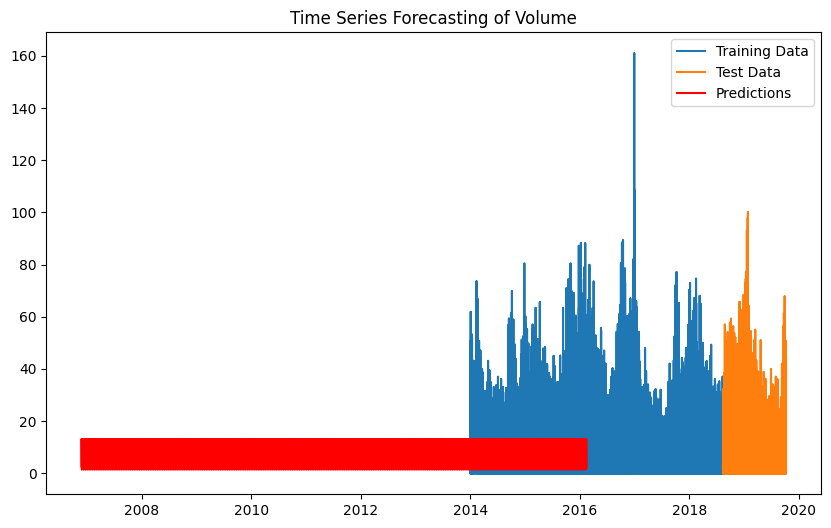

In [26]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Load the data
data = df

# Convert the DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')

# Set the DATE column as the index
data.set_index('DATE', inplace=True)

# Select the target column for forecasting
target = 'VOLUME'

# Split the data into training and test sets
train_data = data[target][:int(0.8*len(data))]
test_data = data[target][int(0.8*len(data)):]

# Initialize and fit the model
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Make predictions
predictions = fit_model.forecast(len(test_data))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(predictions.index, predictions, label='Predictions', color='red')
plt.legend(loc='best')
plt.title('Time Series Forecasting of Volume')
plt.show()
